In [1]:
import numpy as np
import itertools
from copy import copy
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import operator

In [2]:
class Antibody:
    def __init__(self, L):
        self.x1 = np.random.randint(0, 2, L)
        self.x2 = np.random.randint(0, 2, L)
        self.aff = 0

In [3]:
class Clones:
     def __init__(self, original_antibody, number_of_clones):
        self.original = original_antibody
        self.antibody_clones = [copy(original_antibody) for i in range(number_of_clones)]

In [4]:
def rand(N,L):
    population = []
    for i in range(N):
        population.append(Antibody(L))
    return population

In [5]:
popul = rand(5, 22)

In [6]:
for x in popul:
    print(x.x1, x.x2, x.aff)

[0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1] [1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0] 0
[0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0] [1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0] 0
[0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0] [1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1] 0
[0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0] [1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1] 0
[0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1] [0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1] 0


In [7]:
def affinity(tselfunction, population, xmin, xmax):
    for antib in population:
        x_decimal1 = sum(x * 2**i for x, i in zip(antib.x1, range(0, len(antib.x1))))
        x_decimal2 = sum(x * 2**i for x, i in zip(antib.x2, range(0, len(antib.x2))))
        x1 = xmin + x_decimal1 * (xmax-xmin)/(2**len(antib.x1) - 1)
        x2 = xmin + x_decimal2 * (xmax-xmin)/(2**len(antib.x2) - 1)
        antib.aff = tselfunction(x1, x2)
        #print(x_decimal1, x_decimal2, x1, x2)

In [8]:
def limit(x):
    return x

In [13]:
def affinity_limit(tselfunction, limit, population, xmin, xmax):
    for antib in population:
        x_decimal1 = sum(x * 2**i for x, i in zip(antib.x1, range(0, len(antib.x1))))
        x_decimal2 = sum(x * 2**i for x, i in zip(antib.x2, range(0, len(antib.x2))))
        x1 = xmin + x_decimal1 * (xmax-xmin)/(2**len(antib.x1) - 1)
        x2 = xmin + x_decimal2 * (xmax-xmin)/(2**len(antib.x2) - 1)
        if x2 < limit(x1):
            antib.aff = 0
        else:
            antib.aff = tselfunction(x1, x2)

In [14]:
def goldstein(x, y):
    return (1 + (1+x+y)**2 * (19-14*x+3*x**2 - 14*y + 6*x*y +3*y**2)) * (30+ (2*x - 3*y)**2 * (18 - 32*x + 12*x**2 + 48*y - 36*x*y + 27*y**2))

In [10]:
affinity(goldstein, popul, -2, 2)

In [15]:
affinity_limit(goldstein, limit, popul, -2, 2)

In [17]:
for x in popul:
    print(x.x1, x.x2, x.aff)

[0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1] [1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0] 0
[0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0] [1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0] 9065.471587087512
[0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0] [1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1] 1227.4121821393478
[0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0] [1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1] 232889.13868624347
[0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1] [0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1] 3408.636201015552


In [18]:
def sort_population(population):
    return sorted(population, key=operator.attrgetter('aff'), reverse = True)

In [19]:
popul = sort_population(popul)

In [20]:
for x in popul:
    print(x.x1, x.x2, x.aff)

[0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0] [1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1] 232889.13868624347
[0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0] [1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0] 9065.471587087512
[0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1] [0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1] 3408.636201015552
[0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0] [1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1] 1227.4121821393478
[0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1] [1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0] 0


In [21]:
#def number_of_clones(population, N):
#    for antib in population:
#        clones_num = sum(N * i for i in range(1, len(population)))
#    clones_num = round(clones_num/len(population) + 1)
#    print(clones_num)

In [22]:
def number_of_clones(population, beta):
    return round(sum([(beta * len(population)) / i for i in range(1,len(population)+1)]))

In [23]:
clones_amount = number_of_clones(popul, 1)
print(clones_amount)

11


In [24]:
def rand_clones(population, number_of_clones):
    population_clones = []
    for i in population:
        population_clones.append(Clones(i, number_of_clones))
    return population_clones

In [25]:
popul_clones = rand_clones(popul, 5)

In [26]:
for x in popul_clones:
    print("Original")
    print(x.original.x1, x.original.x2, x.original.aff)
    print("Clones")
    for y in x.antibody_clones:
        print(y.x1, y.x2)

Original
[0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0] [1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1] 232889.13868624347
Clones
[0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0] [1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1]
[0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0] [1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1]
[0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0] [1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1]
[0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0] [1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1]
[0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0] [1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1]
Original
[0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0] [1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0] 9065.471587087512
Clones
[0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0] [1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0]
[0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0] [1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0]
[0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0] [1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0]
[0 0 1 1 1 

In [27]:
def mutate(population_clones, probability):
    for x in population_clones:
        #print("Original")
        #print(x.original.x1, x.original.x2, x.original.aff)
        #print("Mutated clones")
        for y in x.antibody_clones:
            el1_random = np.random.binomial(n=1, p=probability, size=[len(y.x1)])
            el2_random = np.random.binomial(n=1, p=probability, size=[len(y.x1)])
#            print("el1_random")
#            print(el1_random)
#            print("el2_random")
#            print(el2_random)
#            print("y.x1")
#            print(y.x1)
#            print("y.x2")
#            print(y.x2)
            y.x1 = np.add(x.original.x1, el1_random)%2  
            y.x2 = np.add(x.original.x2, el2_random)%2
#            print("new y.x1")
#            print(y.x1)
#            print("new y.x2")
#            print(y.x2)
            
            #print(y.x1, y.x2, y.aff)

In [28]:
mutate(popul_clones, 0.3)

In [29]:
for x in popul_clones:
    print("Original")
    print(x.original.x1, x.original.x2, x.original.aff)
    print("Clones")
    for y in x.antibody_clones:
        print(y.x1, y.x2)

Original
[0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0] [1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1] 232889.13868624347
Clones
[1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0] [1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1]
[0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 0] [1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1]
[0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0] [1 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1]
[0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1] [1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1]
[0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0] [1 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0]
Original
[0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0] [1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0] 9065.471587087512
Clones
[1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0] [1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0]
[0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0] [1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1]
[0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0] [0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1]
[0 1 1 1 1 

In [30]:
def affinity_clones(tselfunction, population, xmin, xmax):
    for x in population:
        affinity(tselfunction, x.antibody_clones, xmin, xmax)
    

In [26]:
affinity_clones(goldstein, popul_clones, -2, 2)

In [31]:
for x in popul_clones:
    print("Original")
    print(x.original.x1, x.original.x2, x.original.aff)
    print("Clones")
    for y in x.antibody_clones:
        print(y.x1, y.x2, y.aff)
    print("")

Original
[0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0] [1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1] 232889.13868624347
Clones
[1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0] [1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1] 232889.13868624347
[0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 0] [1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1] 232889.13868624347
[0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0] [1 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1] 232889.13868624347
[0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1] [1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1] 232889.13868624347
[0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0] [1 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0] 232889.13868624347

Original
[0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0] [1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0] 9065.471587087512
Clones
[1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0] [1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0] 9065.471587087512
[0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0] [1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 

In [43]:
def replace(original_population, clone_population):
    for x_orig, x in zip(original_population, clone_population):
        for y in x.antibody_clones:
            if(y.aff > x_orig.aff):
                #print("Changed " + str(x_orig.aff) + " on " + str(y.aff))
                x_orig.x1 = y.x1
                x_orig.x2 = y.x2
                x_orig.aff = y.aff

In [44]:
replace(popul, popul_clones)

In [45]:
for x in popul_clones:
    print("Original")
    print(x.original.x1, x.original.x2, x.original.aff)
    print("Clones")
    for y in x.antibody_clones:
        print(y.x1, y.x2, y.aff)
    print("")

Original
[0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0] [1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1] 259347.59700613905
Clones
[0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0] [1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1] 46768.850590854054
[0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1] [0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0] 49146.40442721155
[0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0] [1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1] 259347.59700613905
[1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0] [1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0] 90.03581281699267
[1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0] [1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1] 1535.6556920866371

Original
[1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0] [1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1] 320494.9664615214
Clones
[1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1] [1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0] 1006.8852332493251
[1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0] [0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0

In [46]:
for x in popul:
    print(x.x1, x.x2, x.aff)

[0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0] [1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1] 259347.59700613905
[1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0] [1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1] 320494.9664615214
[1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0] [1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0] 18337.42329800906
[0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0] [1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1] 336451.26557349105
[1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0] [0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1] 465792.864076374


In [47]:
sort_population(popul)

In [48]:
for x in popul:
    print(x.x1, x.x2, x.aff)

[0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0] [1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1] 259347.59700613905
[1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0] [1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1] 320494.9664615214
[1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0] [1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0] 18337.42329800906
[0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0] [1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1] 336451.26557349105
[1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0] [0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1] 465792.864076374


In [43]:
def edit(population, numerosity_to_change, L):
    sort_population(population)
    population = population[:len(population) - numerosity_to_change]
    for i in range(numerosity_to_change):
        population.append(Antibody(L))
    return population
    

In [44]:
def delete_low_aff(population, L):
    i = 0
    sort_population(population)
    for x in population:
        if x.aff == 0:
            i+=1
    return edit(population, i, L)

In [61]:
def add_new_anti(population, number, L):
    while len(population) < number:
        population.append(Antibody(L))
    return population

In [62]:
for x in popul:
    print(x.x1, x.x2, x.aff)

[0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0] [1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1] 232889.13868624347
[0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0] [1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0] 9065.471587087512
[0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1] [0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1] 3408.636201015552
[1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1] [0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1] 0


In [63]:
popul = add_new_anti(popul, 6, 22)

In [46]:
popul = delete_low_aff(popul, 22)

In [64]:
for x in popul:
    print(x.x1, x.x2, x.aff)

[0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0] [1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1] 232889.13868624347
[0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0] [1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0] 9065.471587087512
[0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1] [0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1] 3408.636201015552
[1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1] [0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1] 0
[0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1] [1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0] 0
[0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1] [0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0] 0


In [48]:
popul = edit(popul, 1, 22)

In [49]:
for x in popul:
    print(x.x1, x.x2, x.aff)

[0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0] [1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1] 232889.13868624347
[0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0] [1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0] 9065.471587087512
[0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1] [0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1] 3408.636201015552
[1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1] [0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1] 0


In [50]:
def plot_min_max(tselfunction, population, xmin, xmax, step):
    X1 = []
    X2 = []
    F = []
    for antib in population:
        x_decimal1 = sum(x * 2**i for x, i in zip(antib.x1, range(0, len(antib.x1))))
        x_decimal2 = sum(x * 2**i for x, i in zip(antib.x2, range(0, len(antib.x2))))
        x1 = xmin + x_decimal1 * (xmax-xmin)/(2**len(antib.x1) - 1)
        x2 = xmin + x_decimal2 * (xmax-xmin)/(2**len(antib.x2) - 1)
        antib.aff = tselfunction(x1, x2)
        X1.append(x1)
        X2.append(x2)
        F.append(antib.aff)
        #print(x_decimal1, x_decimal2, x1, x2)



    X = np.arange(xmin, xmax, step)
    Y = np.arange(xmin, xmax, step)
    X, Y = np.meshgrid(X, Y)
    Z = tselfunction(X, Y)


    fig = plt.figure(figsize=(7,7))
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='jet', edgecolor = 'none')
    ax.scatter3D(X1,X2,F, c='black', depthshade=False)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f(x1,x2)')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='jet', edgecolor = 'none')
    plt.show()

In [51]:
def plot_min_max_lin(tselfunction, population, xmin, xmax, step):
    X1 = []
    X2 = []
    F = []
    for antib in population:
        x_decimal1 = sum(x * 2**i for x, i in zip(antib.x1, range(0, len(antib.x1))))
        x_decimal2 = sum(x * 2**i for x, i in zip(antib.x2, range(0, len(antib.x2))))
        x1 = xmin + x_decimal1 * (xmax-xmin)/(2**len(antib.x1) - 1)
        x2 = xmin + x_decimal2 * (xmax-xmin)/(2**len(antib.x2) - 1)
        antib.aff = tselfunction(x1, x2)
        X1.append(x1)
        X2.append(x2)
        F.append(antib.aff)
        #print(x_decimal1, x_decimal2, x1, x2)



    X = np.linspace(xmin, xmax, 100)     
    Y = np.linspace(xmin, xmax, 100)     
    X, Y = np.meshgrid(X, Y) 
    Z = tselfunction(X, Y)
 
    fig = plt.figure(figsize=(7,7))
    ax = plt.axes(projection='3d')
    ax.scatter3D(X1,X2,F, c='black', depthshade=False)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f(x1,x2)')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='jet', edgecolor = 'none')
    plt.show()


In [58]:
def antibody_optimization(iterations, number_of_population, L, function, probability_of_mutation, beta, amount_new_antibody, function_min, function_max, step, plot_function):
    antigen_population = rand(number_of_population, L)
    clones_amount = number_of_clones(antigen_population, beta)
    #clones_amount = 5
    for iter in range(1, iterations + 1):
        affinity(function, antigen_population, function_min, function_max)
        antigen_population = sort_population(antigen_population)
        antigen_population_with_clones = rand_clones(antigen_population, clones_amount)
        mutate(antigen_population_with_clones, probability_of_mutation)
        affinity_clones(function, antigen_population_with_clones, function_min, function_max)
        replace(antigen_population, antigen_population_with_clones)
        antigen_population = edit(antigen_population, amount_new_antibody, L)
        antigen_population = sort_population(antigen_population)
        if  iter == 1 or iter%10 == 0:
            print("")
            print(iter)
            plot_function(function, antigen_population, function_min, function_max, step)
            for x in antigen_population:
                    print(x.x1, x.x2, x.aff)
                    print("")


    

In [66]:
def antibody_optimization_limit(iterations, number_of_population, L, function, limit, probability_of_mutation, beta, amount_new_antibody, function_min, function_max, step, plot_function):
    antigen_population = rand(number_of_population, L)
    clones_amount = number_of_clones(antigen_population, beta)
    #clones_amount = 5
    for iter in range(1, iterations + 1):
        affinity_limit(function, antigen_population, limit, function_min, function_max)
        antigen_population = sort_population(antigen_population)
        anitgen_population = delete_low_aff(anitgen_population, L)
        antigen_population_with_clones = rand_clones(antigen_population, clones_amount)
        mutate(antigen_population_with_clones, probability_of_mutation)
        affinity_clones(function, antigen_population_with_clones, function_min, function_max)
        replace(antigen_population, antigen_population_with_clones)
        antigen_population = add_new_anti(antigen_population, number_of_population, L)
        antigen_population = sort_population(antigen_population)
        if  iter == 1 or iter%10 == 0:
            print("")
            print(iter)
            plot_function(function, antigen_population, function_min, function_max, step)
            for x in antigen_population:
                    print(x.x1, x.x2, x.aff)
                    print("")



In [70]:
iterations = 50
number_of_population = 100
L = 22
probability_of_mutation = 0.03
beta = 0.1
amount_new_antibody = 3

In [60]:
def rastrigin(X, Y):
    return (X**2 - 10 * np.cos(2 * np.pi * X)) + (Y**2 - 10 * np.cos(2 * np.pi * Y)) + 20


1


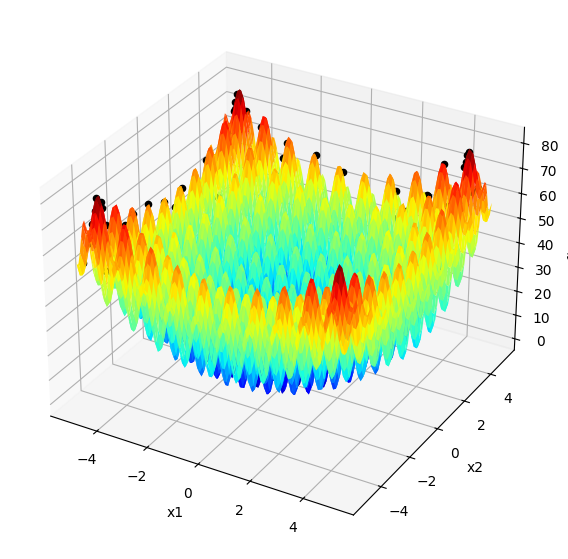

[0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0] [0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0] 79.65817960235712

[0 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1] [1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1] 79.5730077882466

[1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0] [1 1 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1] 78.5962053203807

[0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1] [0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1] 78.31994562333202

[1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0] [0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0] 77.972114501325

[0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1] [1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0] 76.49222407305726

[1 0 0 0 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0] [1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0] 76.33957384225906

[1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0] [1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0] 75.36225058184091

[0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0] [1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1] 74.67888241687065

[0 1 

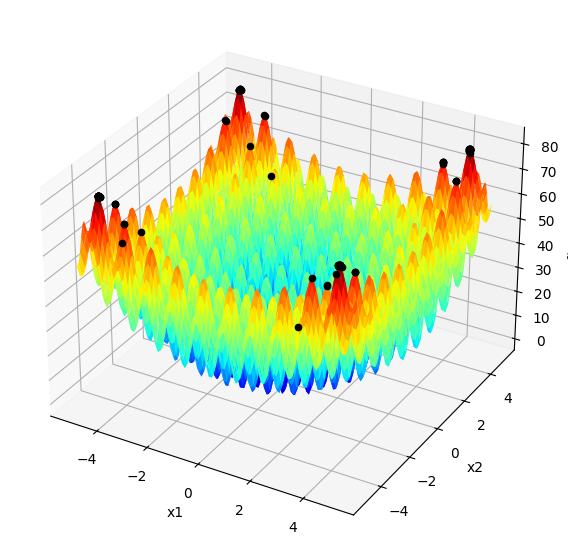

[0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1] [1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0] 80.70657671337153

[0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0] [1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0] 80.70656418551388

[1 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1] [0 0 1 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1] 80.70648518451677

[1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1] [1 1 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1] 80.70646056842247

[1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1] [1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1] 80.70643904456045

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0] [1 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1] 80.70481128313281

[0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1] [0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1] 80.70478002992061

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0] [0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1] 80.70477462930123

[0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0] [0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0] 80.70473981922564

[

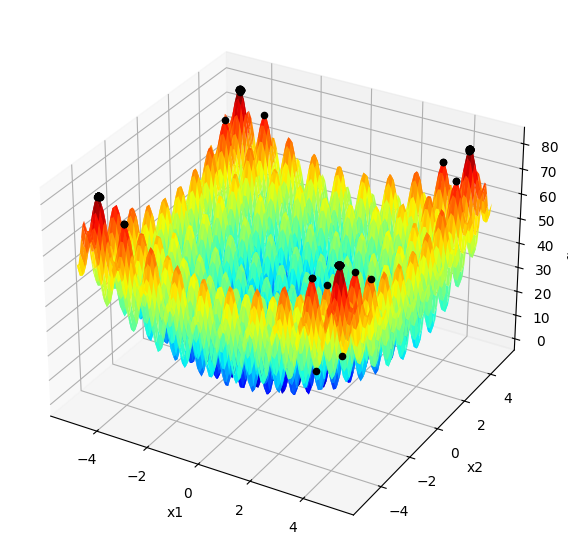

[1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0] [1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0] 80.70658038641365

[1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1] [1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1] 80.70658025978918

[0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1] [0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0] 80.70657679511328

[0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0] [1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0] 80.70657658057121

[0 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1] [1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1] 80.7065760802263

[0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0] [0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0] 80.70657378341531

[0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1] [1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1] 80.70653299302926

[1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1] [1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1] 80.70653298773844

[1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0] [0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0] 80.70653294106123

[1

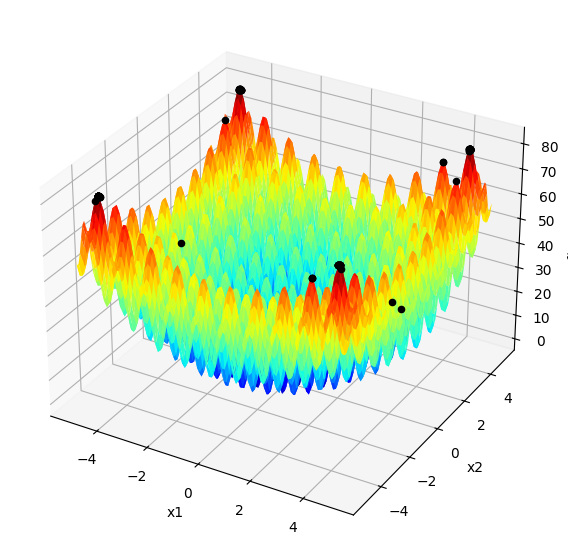

[1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0] [1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0] 80.70658038641365

[1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1] [1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1] 80.70658025978918

[0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0] [0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0] 80.70658025978918

[0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1] [0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1] 80.70657691644695

[0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1] [0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0] 80.70657679511328

[0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0] [1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0] 80.70657679511328

[0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0] [0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1] 80.70657310079295

[1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1] [1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1] 80.70653299358231

[0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1] [1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1] 80.70653299302926

[

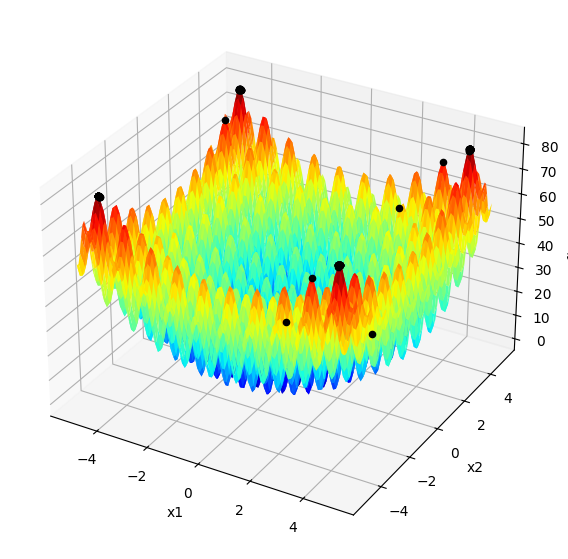

[1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0] [1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0] 80.70658038641365

[0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0] [0 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0] 80.7065803816759

[0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0] [1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0] 80.70658026507999

[1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1] [1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1] 80.70658025978918

[0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1] [0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1] 80.70657691644695

[0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1] [0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0] 80.70657679511328

[0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0] [1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0] 80.70657679511328

[0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0] [1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1] 80.70657678903846

[1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1] [1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1] 80.70653299358231

[0

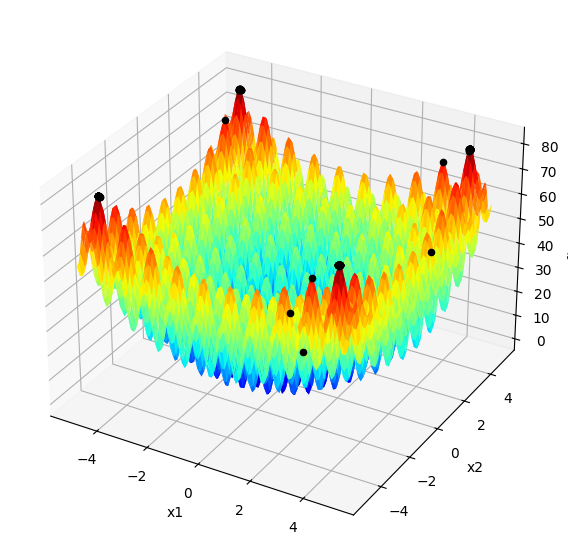

[1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0] [0 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0] 80.70658038696672

[0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0] [0 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0] 80.7065803816759

[1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0] [1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1] 80.70658035553504

[1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1] [1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1] 80.70658026563305

[0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0] [1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0] 80.70658026507999

[0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1] [0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1] 80.70657691644695

[0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1] [0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0] 80.70657679511328

[0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0] [1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0] 80.70657679511328

[1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1] [1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1] 80.70653299358231

[0

In [61]:
antibody_optimization(iterations, number_of_population, L, rastrigin, probability_of_mutation, beta, amount_new_antibody, -5.12, 5.12, 100, plot_min_max_lin)

In [54]:
def shestigorb(x, y):
    return (4 - 2.1 * x**2 + (x**4) / 3) * x**2 + x*y + (-4 - 4 * y**2)


1


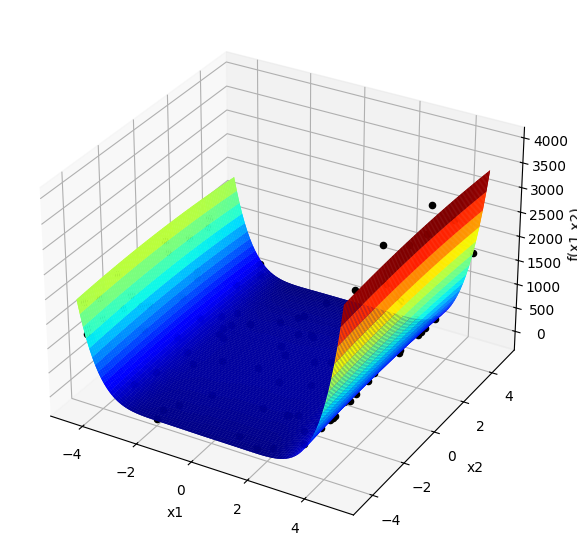

[1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1] [0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0] 3917.395804531693

[1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1] [1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1] 3827.0467440876023

[1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1] [1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0] 3488.6962951167843

[1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1] [1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0] 3365.8794274486663

[1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1] [0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1] 3246.0415884090226

[1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1] [1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1] 3003.11220771883

[1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1] [1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0] 2977.071634322066

[0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1 1] [0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 0] 2195.607916501774

[1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0] [0 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0] 1828.212453119223

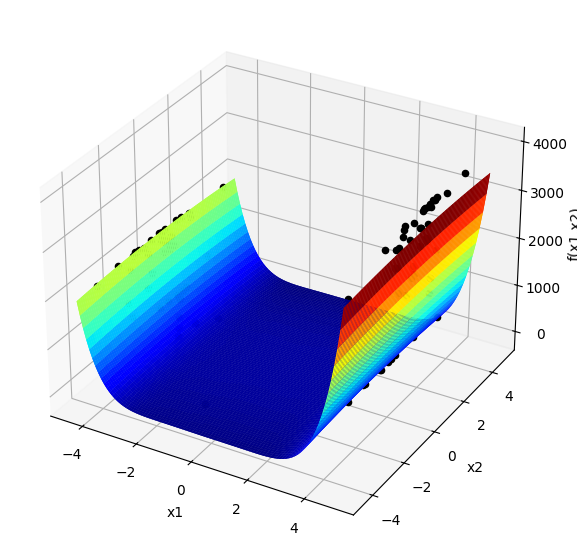

[1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 1] 3991.3304244432347

[1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1] [1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1] 3989.2894990888926

[1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1] [0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0] 3987.5113629857133

[0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1] [1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1] 3985.2706642954577

[0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0] 3983.02359177939

[1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1] [0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1] 3977.2683426390254

[0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1] [1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0] 3974.132955072337

[0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1] [0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1] 3968.9450373831237

[0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1] [0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1] 3966.7328552592

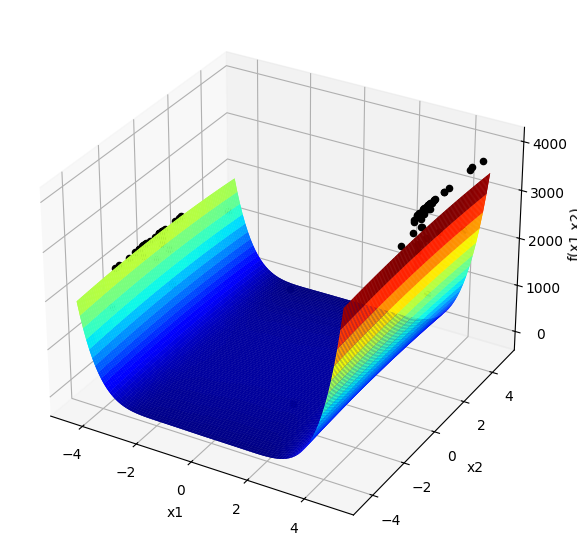

[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1] 3993.371173492115

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1] 3993.314522591067

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1] 3993.1788921419957

[0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1] 3992.9685644459073

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0] 3992.806467783465

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0] 3992.5867823213975

[1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1] 3992.479047446095

[1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0] 3992.478502896718

[0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0] 3992.450905829630

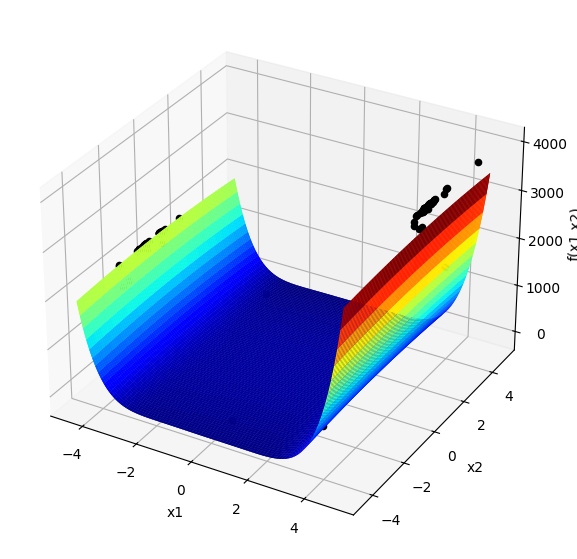

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1] 3993.395832375113

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1] 3993.3697810455183

[1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1] 3993.34829030378

[1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1] 3993.2477436458294

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1] 3993.2044208899865

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1] 3993.178993406061

[1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1] 3993.103172832251

[1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1] 3993.014480361969

[0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1] 3992.992305218841


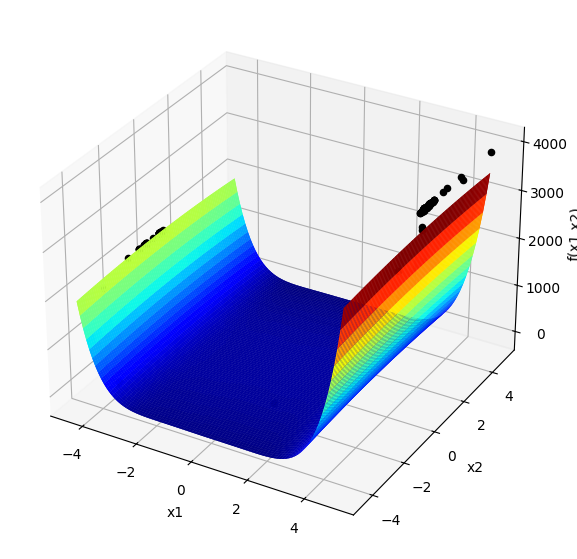

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [0 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1] 3993.3958325281

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1] 3993.3957696178754

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1] 3993.394314611816

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1] 3993.3713846203245

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1] 3993.3712569587697

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1] 3993.3710034936753

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1] 3993.3496744243366

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1] 3993.34269979601

[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1] 3993.341390697465


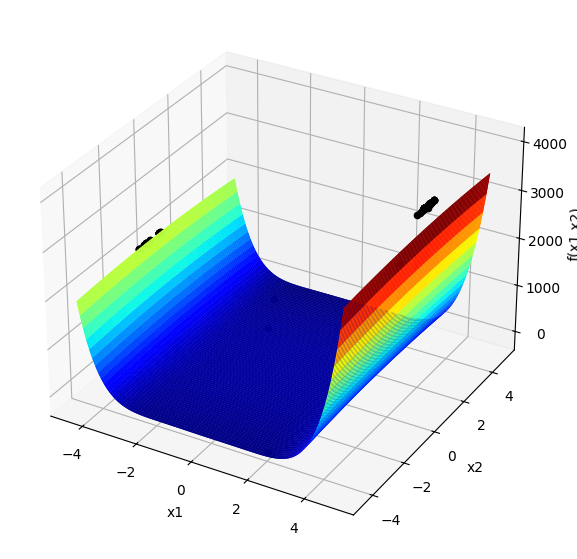

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1] 3993.3958325918256

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1] 3993.395797475009

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1] 3993.3957699068187

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1] 3993.3957475084258

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1] 3993.3950812159137

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1] 3993.3943149648667

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1] 3993.391953627352

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1] 3993.371394535623

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1] 3993.3713477744

In [55]:
antibody_optimization(iterations, number_of_population, L, shestigorb, probability_of_mutation, beta, amount_new_antibody, -4.5, 5, 0.1, plot_min_max)

In [56]:
def beale(X, Y):
    return (1.5-X+X*Y)**2+(2.25-X+X*Y**2)**2+(2.625-X+X*Y**3)**2  


1


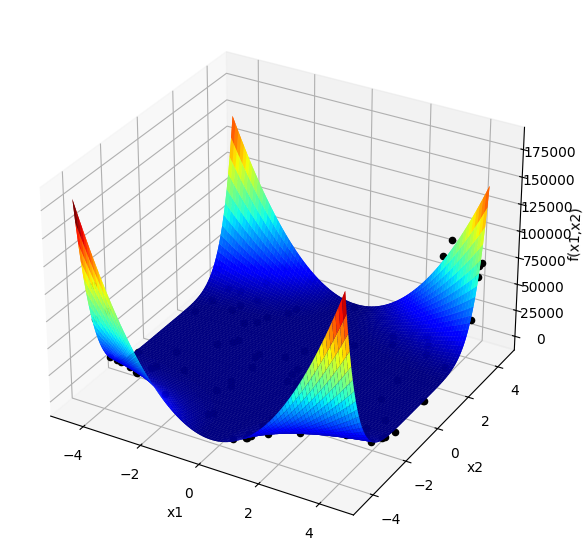

[1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0] [1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0] 104651.88638525478

[0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1] [1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1] 85883.65710335883

[1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0] [1 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0] 84637.40637064117

[1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1] [0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1] 81009.39689998137

[1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1] [1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1] 77636.4229116784

[1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1] [1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0] 70767.38862479673

[0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1] [1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1] 68760.28371159898

[0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1] [0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1] 68161.52861502171

[1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0] [0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0] 65738.37431705339

[

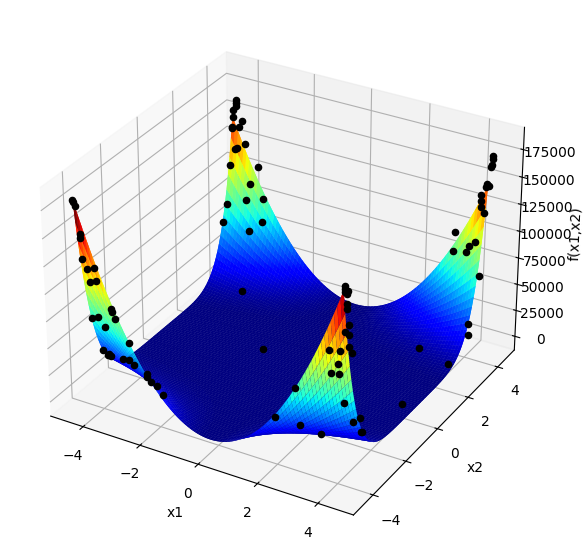

[0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0] [0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0] 180912.64918868087

[0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0] [1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 179599.56742571972

[1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0] [1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0] 176191.7083900329

[0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1] [0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] 174035.41800239132

[1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1] [1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1] 172798.7093114553

[1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1] [0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0] 171734.47926463097

[1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1] [0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1] 170223.10355765602

[0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1] [0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0] 170008.14780117298

[1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1] [0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0] 168935.9225535

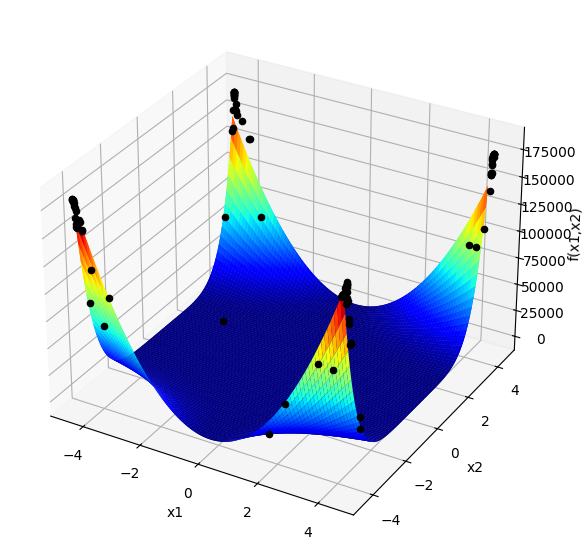

[0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 181830.3244461142

[1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0] 181517.29502631116

[1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0] [0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 181281.50588756212

[1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0] [1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0] 181260.22638995817

[0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0] [0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0] 181179.4451133089

[0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0] [1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 180684.06899421714

[0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0] [1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] 180532.66706626627

[1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0] [0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 179307.1402378414

[1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0] [0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0] 178545.79122725

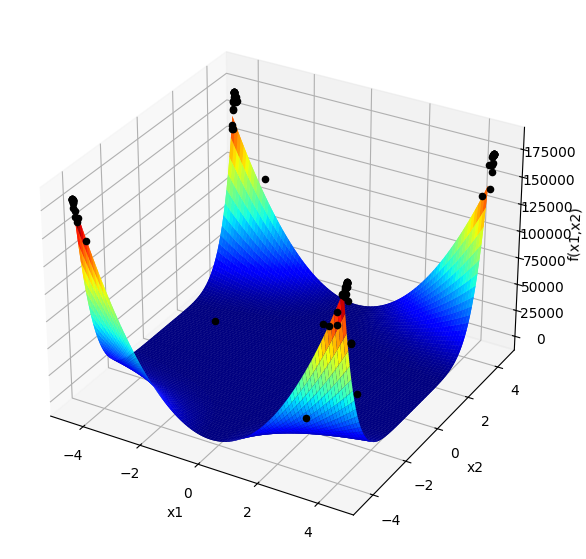

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 181853.26822486467

[1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 181819.4228211139

[0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 181654.3047044765

[1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] 181594.19833689983

[1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0] [0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 181460.87678172067

[1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0] 181456.46866243368

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0] [1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 181400.24726623375

[0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0] [1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 181356.81210483584

[1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0] [0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 181340.0877467

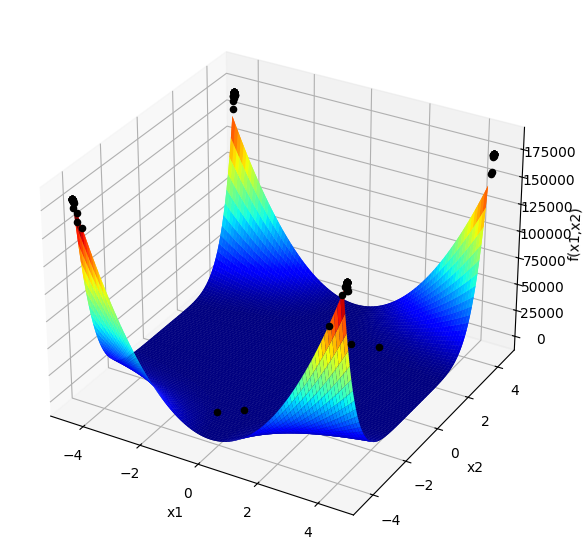

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 181853.26822486467

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 181853.26822486467

[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 181853.09569679477

[1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 181852.40558533362

[1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 181848.20916915237

[0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0] [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 181806.07678046008

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 181759.23717736115

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 181753.72245234132

[0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 181659.07992

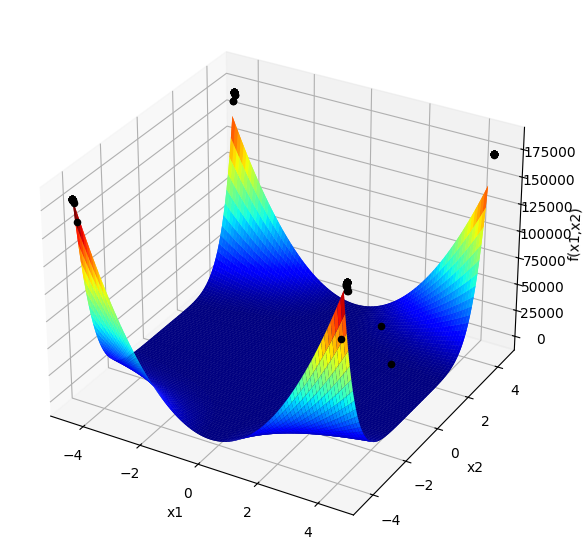

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 181853.26822486467

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 181853.26822486467

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 181853.26822486467

[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 181853.09569679477

[1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 181852.40558533362

[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 181850.55967133548

[1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 181848.20916915237

[0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 181844.32283544837

[1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 181834.53347

In [57]:
antibody_optimization(iterations, number_of_population, L, beale, probability_of_mutation, beta, amount_new_antibody, -4.5, 4.5, 0.1, plot_min_max)

Changed -7.3697215987747065 on 334.0555449896835
Changed 334.0555449896835 on 697.9865951880201
Changed -3.1193234133244507 on 30.518062898475772
Changed 30.518062898475772 on 507.869540393176
Changed -47.70937642628871 on -4.43877501601836
Changed -4.43877501601836 on 10.991999489029917
Changed 10.991999489029917 on 35.77530386125934
Changed 35.77530386125934 on 1072.099477521388
Changed -7.905945442504954 on -7.130752674486702
Changed -7.130752674486702 on 1264.5296507430526
Changed -4.570402499049386 on 433.39073070771383
Changed -12.085970344269255 on -9.706817501404696
Changed -9.706817501404696 on 771.0551132174198
Changed 771.0551132174198 on 1749.6908751155245
Changed -4.639088670078954 on -1.5675966450503291
Changed -1.5675966450503291 on 231.038950979696
Changed -54.66433027716903 on 174.8112546646035
Changed 174.8112546646035 on 471.4668324640404
Changed 1442.2867154058256 on 1537.9863646505594
Changed -18.423822056724735 on -17.603430993113996
Changed -17.603430993113996 on

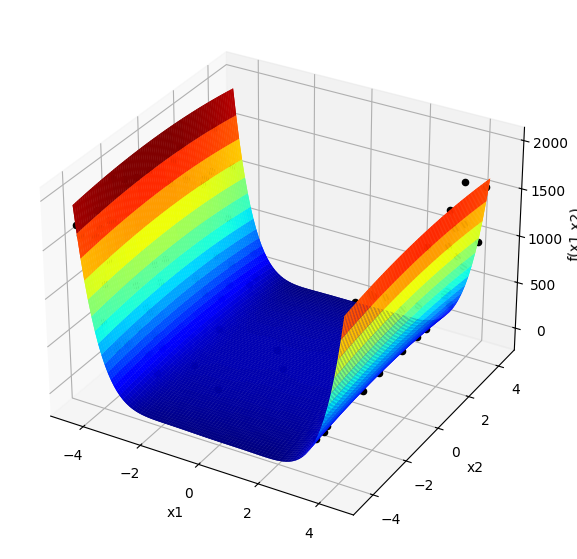

Changed 697.9865951880201 on 699.4296464027913
Changed 507.869540393176 on 1407.866104707828
Changed 433.39073070771383 on 576.878781729966
Changed 576.878781729966 on 1482.9438535470908
Changed 370.1273932988514 on 1731.0969671985802
Changed 231.038950979696 on 1103.7081058143854
Changed 471.4668324640404 on 641.4406641996746
Changed 500.21479949176194 on 519.594190471897
Changed 1499.1181722406657 on 1672.2682531862324
Changed 1672.2682531862324 on 1897.241073783066
Changed 315.064147291449 on 1065.7624392529526
Changed 459.11585804200223 on 1263.0083973504911
Changed 1276.8483981035984 on 1387.951449595294
Changed 711.6344846107713 on 1122.7164574801086
Changed 258.73385053701844 on 481.40121385914375
Changed 1906.538416530389 on 1932.528098617009
Changed 1932.528098617009 on 1961.3862557750665
Changed 8.55278669126344 on 20.01346285209127
Changed 20.01346285209127 on 240.355240231216
Changed 1611.317772864835 on 1832.7944573543245
Changed 1727.7154471287888 on 1730.2802607320805
Ch

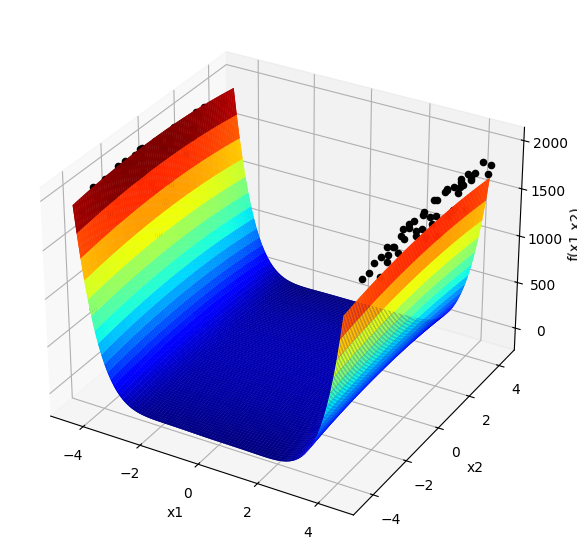

Changed 1579.466770794187 on 1806.8979325513353
Changed 1934.1606296335906 on 1959.1317974366714
Changed 1918.7507271030947 on 1935.451609258345
Changed 1754.6938115520172 on 1905.881647816121
Changed 1680.1642001518762 on 1979.0202087681557
Changed 1333.6032145024274 on 1405.389763926278
Changed 1861.947399364759 on 1922.4529612383626
Changed 1928.860414694273 on 1966.9364942404486
Changed 1826.8991337244436 on 1833.6734708310273
Changed 1816.7753971213526 on 1854.639622511763
Changed 1593.3019696226113 on 1922.7033898748432
Changed 1935.2000302798494 on 1947.684959614456
Changed 1654.151159283593 on 1703.143814216305
Changed 1495.7340487553977 on 1897.7086751045993
Changed 1713.5816970681326 on 1879.7142395310343
Changed 1881.9088802010583 on 1979.113809833159
Changed 1620.5564301203242 on 1782.508972654318
Changed 1866.2243387665137 on 1883.8767872843262
Changed 1925.6688982338972 on 1934.6774275773048
Changed 1858.133317875223 on 1951.388460807651
Changed 1807.0872754818195 on 1841

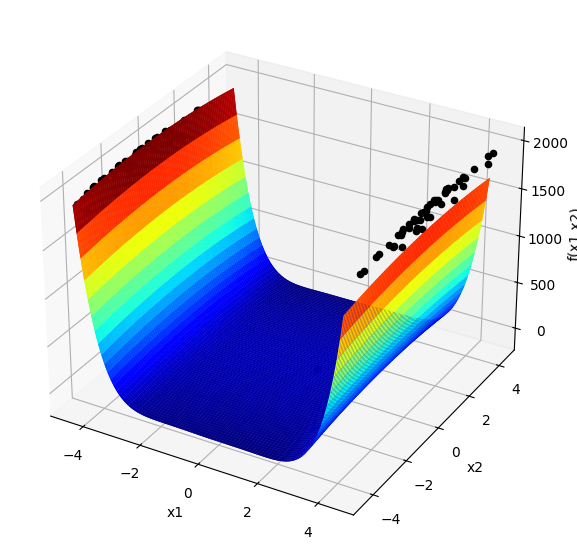

Changed 1868.610401063711 on 1960.068138544868
Changed 1913.5139283318038 on 1936.7938017395925
Changed 1806.276150419066 on 1855.0167456410984
Changed 1924.6154600162997 on 1929.8708574300117
Changed 1922.298943549389 on 1924.0558770846615
Changed 1948.157761358494 on 1949.0391361411096
Changed 1854.0939330445158 on 1953.1851493326558
Changed 1776.2453314248082 on 1809.5453445678356
Changed 1767.4594348302485 on 1920.647975639127
Changed 1936.9690109576056 on 1975.9479341779556
Changed 1866.0518409906613 on 1877.8982259842744
Changed -1.7442741303264184 on 347.719473734963
Changed 347.719473734963 on 598.4738451083042
Changed 289.029222636091 on 970.7752520518103
Changed 451.3360444020381 on 925.8755737740773
Changed 1905.7084737130456 on 1963.4850925216824
Changed 1870.5300296594996 on 1953.3382765517335
Changed 1834.9733995779907 on 1868.4060155852633
Changed 1937.0303159526552 on 1944.1800360161758
Changed 1947.0996640939616 on 1959.1554785253531
Changed 1938.5676120131723 on 1950.

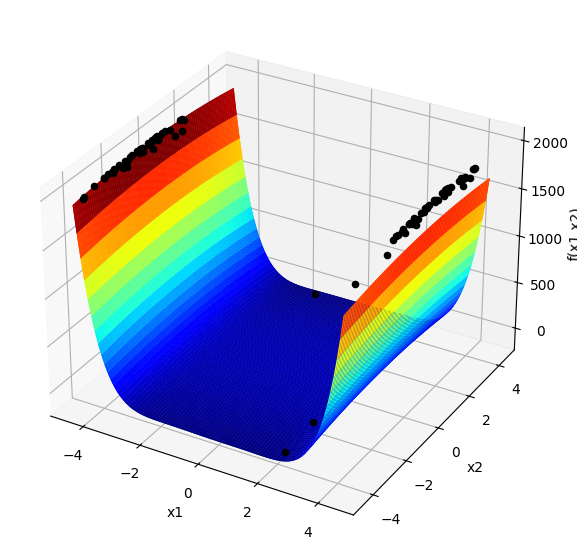

Changed 1978.997896441966 on 1979.7843859051366
Changed 1936.7938017395925 on 1974.557786902581
Changed 1946.4744651207093 on 1971.8037344538952
Changed 1932.1398499971187 on 1949.8760882858437
Changed 1884.8468551141852 on 1909.163627809024
Changed 1847.9768373737706 on 1900.3258079577656
Changed -77.19142219408339 on -4.273687994425574
Changed -4.273687994425574 on -4.100886643401239
Changed -4.100886643401239 on 1240.5559685283595
Changed -68.68273959638341 on -2.8823366591038138
Changed -2.8823366591038138 on 0.936710859760403
Changed -21.461843366759197 on 413.7987867517574
Changed 1971.8037344538952 on 1972.1760760425777
Changed 1971.5824071047791 on 1973.744265027286
Changed 1841.1098513545173 on 1969.6339852964304
Changed 1910.7480479053745 on 1971.2446890755018
Changed 1908.436503126791 on 1917.9914125541902
Changed 1952.9219542929268 on 1980.2504165810167
Changed 917.627776409828 on 942.5437135888908
Changed 942.5437135888908 on 1129.773598283818
Changed -13.1277573705922 on 

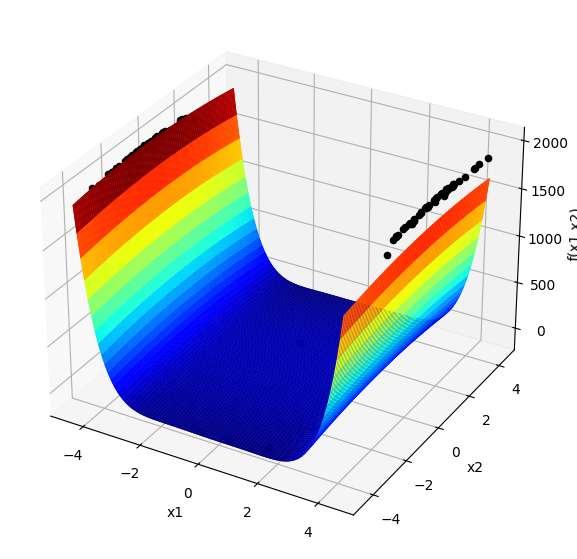

Changed 1953.2963280701144 on 1975.1906039012072
Changed 1971.3457815194301 on 1977.1729818244198
Changed 1923.5354006476816 on 1962.767460391314
Changed 1955.1831633935483 on 1968.8697334999963
Changed 1965.2060347330569 on 1970.6264949093688
Changed -8.43664466019612 on -4.360601102701493
Changed -4.360601102701493 on 422.6242475905298
Changed 279.3821399494997 on 652.0074547535881
Changed -74.20681382557217 on -57.4969671746362
Changed -57.4969671746362 on -5.72321380542392
Changed -5.72321380542392 on 439.497254377367
Changed 1972.1760760425777 on 1979.6092640429551
Changed 1956.0039125502797 on 1964.049977165186
Changed 1839.2267204167413 on 1887.0436877604445
Changed 1887.0436877604445 on 1956.1338042118853
Changed 1980.8646907926875 on 1982.1631176579065
Changed 1971.2446890755018 on 1973.2471157464056
Changed 1983.7615523649836 on 1983.7675154066721
Changed -6.805296074304708 on -2.090447303746563
Changed -2.090447303746563 on 1206.7382737162088
Changed -75.11666088470409 on -5

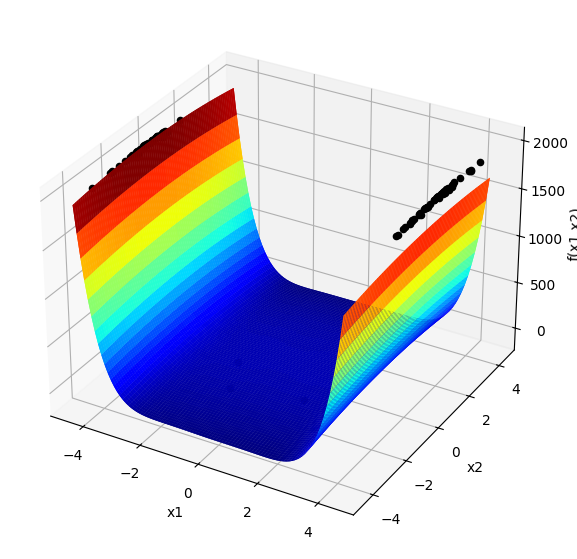

In [347]:
iterations = 50
antigen_population = rand(100, 22)
for iter in range(1, iterations + 1):
    affinity(shestigorb, antigen_population, -4.5, 4.5)
    sort_population(antigen_population)
    antigen_population_with_clones = rand_clones(antigen_population, 5)
    mutate(antigen_population_with_clones, 0.3)
    affinity_clones(shestigorb, antigen_population_with_clones, -4.5, 4.5)
    replace(antigen_population, antigen_population_with_clones)
    antigen_population = edit(antigen_population, 3, 22)
    if  iter == 1 or iter%10 == 0:
        print("")
        print(iter)
        plot_min_max(shestigorb, antigen_population, -4.5, 4.5, 0.1)
        #for x in antigen_population:
            #print(x.x1, x.x2, x.aff)


1


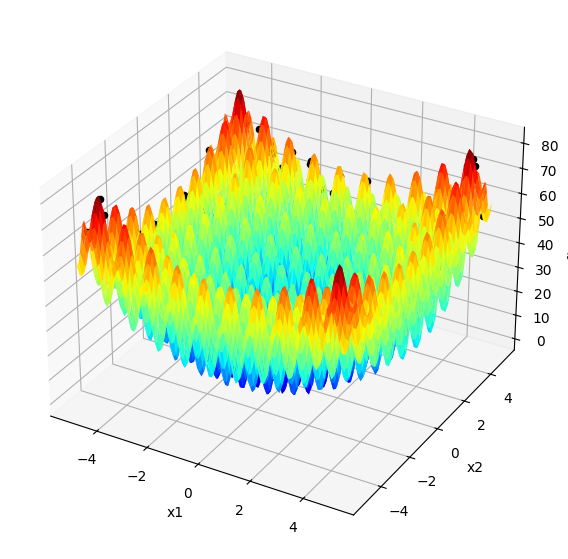


10


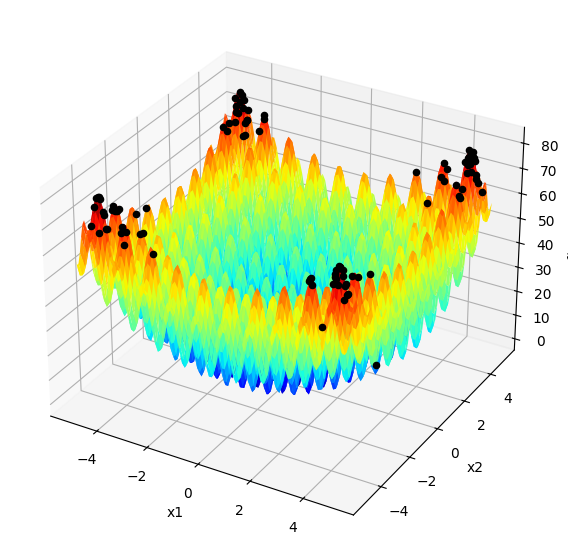


20


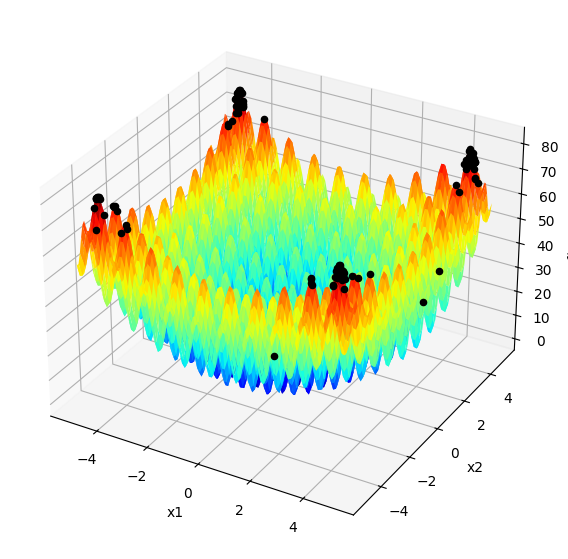


30


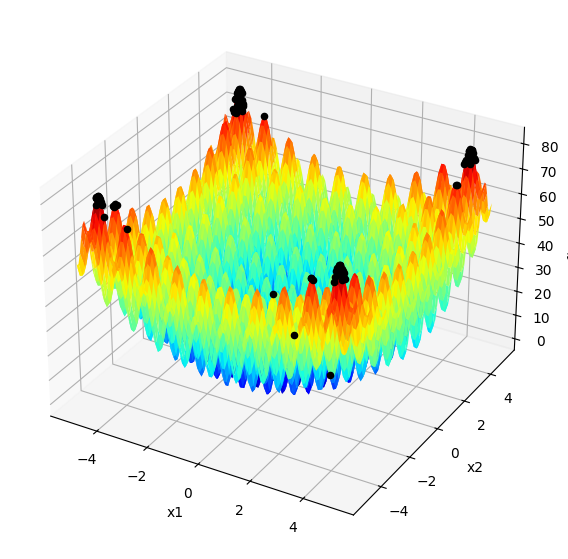


40


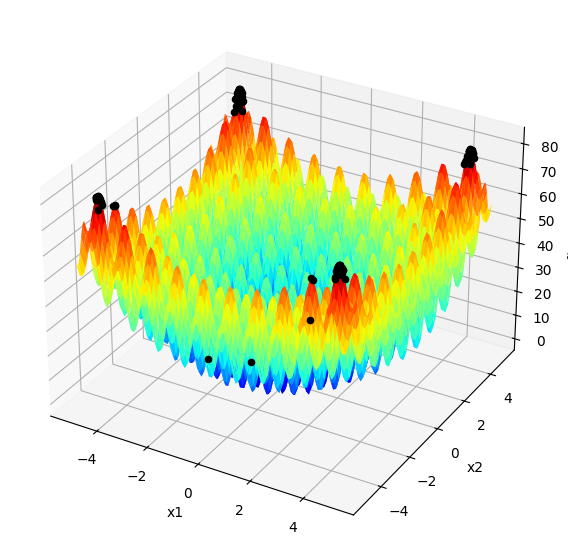


50


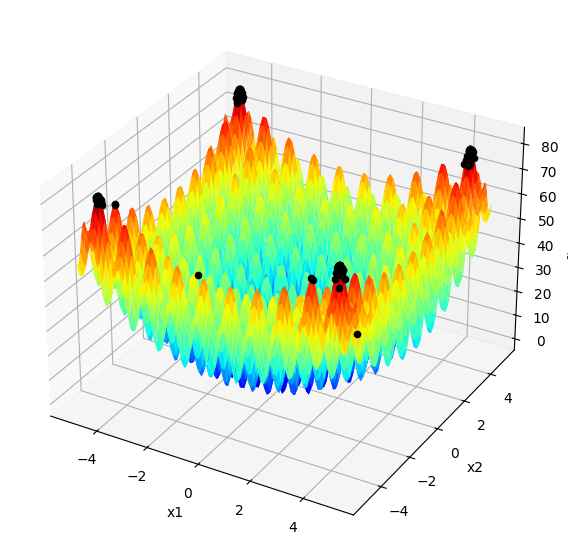

In [166]:
iterations = 50
antigen_population = rand(100, 22)
for iter in range(1, iterations + 1):
    affinity(rastrigin, antigen_population, -5.12, 5.12)
    sort_population(antigen_population)
    antigen_population_with_clones = rand_clones(antigen_population, 5)
    mutate(antigen_population_with_clones, 0.3)
    affinity_clones(rastrigin, antigen_population_with_clones, -5.12, 5.12)
    replace(antigen_population, antigen_population_with_clones)
    antigen_population = edit(antigen_population, 3, 22)
    if  iter == 1 or iter%10 == 0:
        print("")
        print(iter)
        plot_min_max_lin(rastrigin, antigen_population, -5.12, 5.12, 100)
        #for x in antigen_population:
            #print(x.x1, x.x2, x.aff)


1


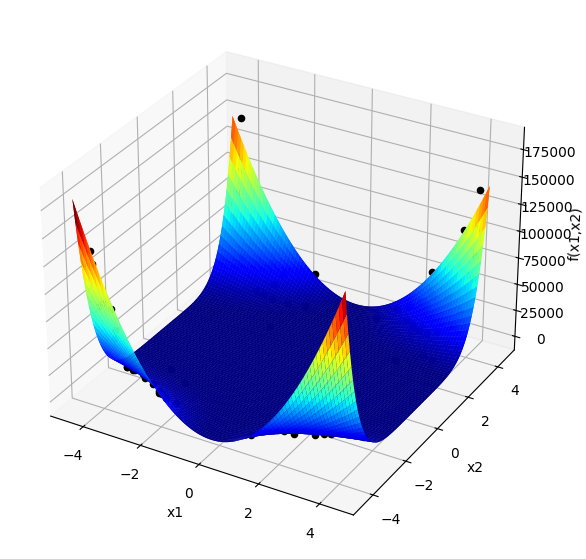


10


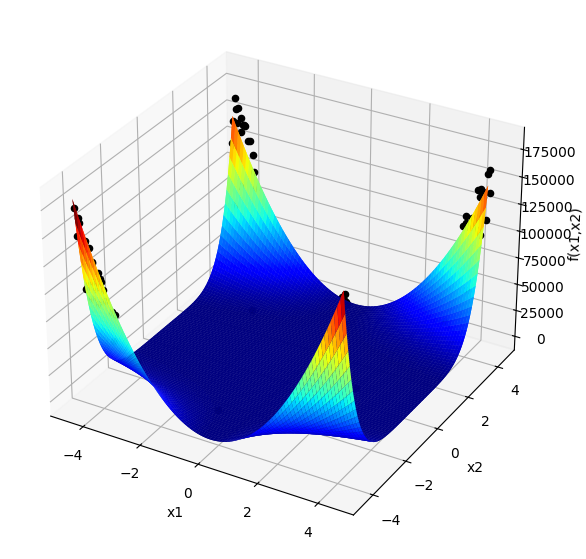


20


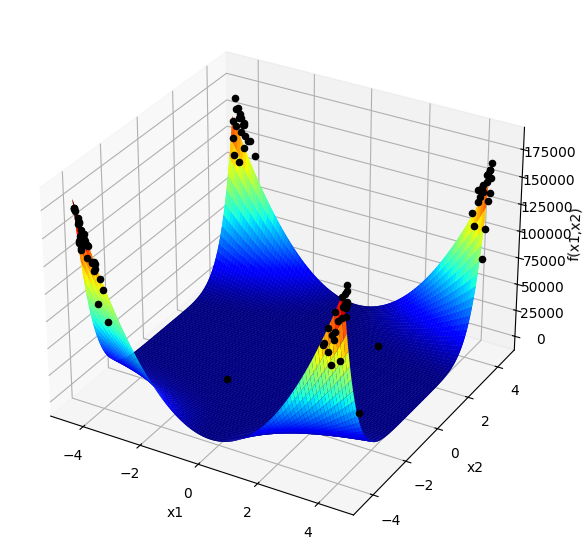


30


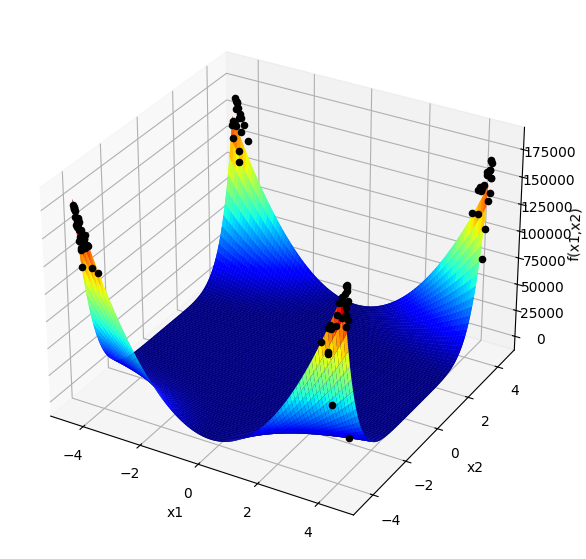


40


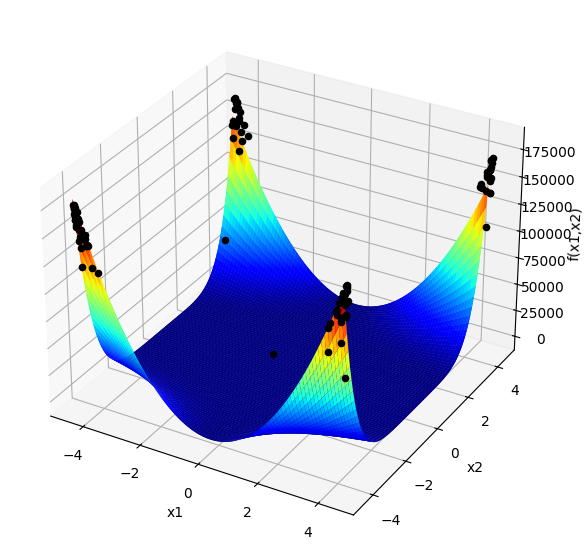


50


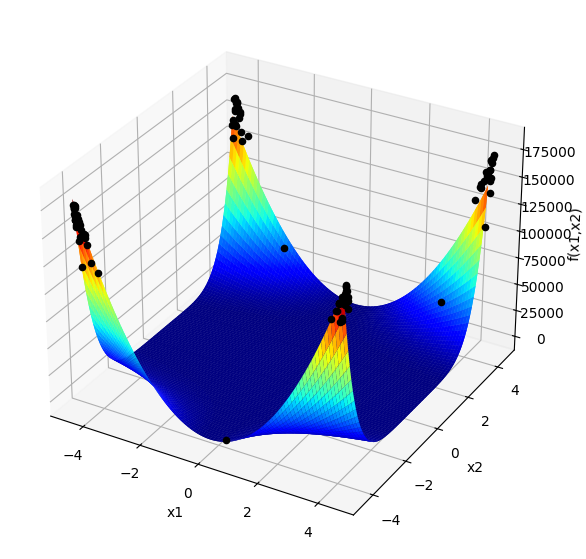

In [173]:
iterations = 50
antigen_population = rand(100, 22)
for iter in range(1, iterations + 1):
    affinity(beale, antigen_population, -4.5, 4.5)
    sort_population(antigen_population)
    antigen_population_with_clones = rand_clones(antigen_population, 5)
    mutate(antigen_population_with_clones, 0.3)
    affinity_clones(beale, antigen_population_with_clones, -4.5, 4.5)
    replace(antigen_population, antigen_population_with_clones)
    antigen_population = edit(antigen_population, 3, 22)
    if  iter == 1 or iter%10 == 0:
        print("")
        print(iter)
        plot_min_max(beale, antigen_population, -4.5, 4.5, 0.1)
        #for x in antigen_population:
            #print(x.x1, x.x2, x.aff)


1


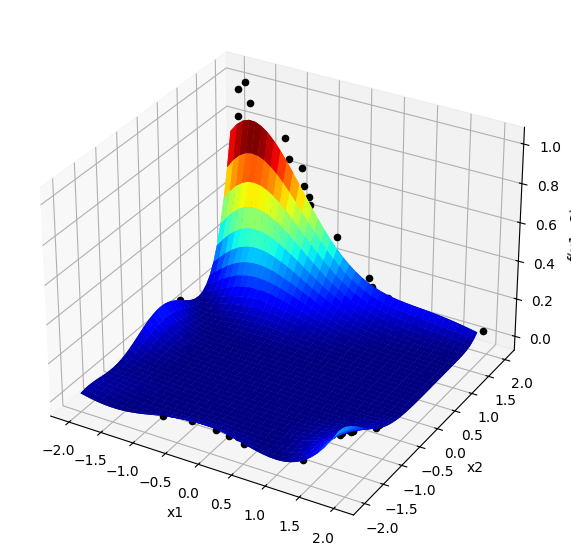


10


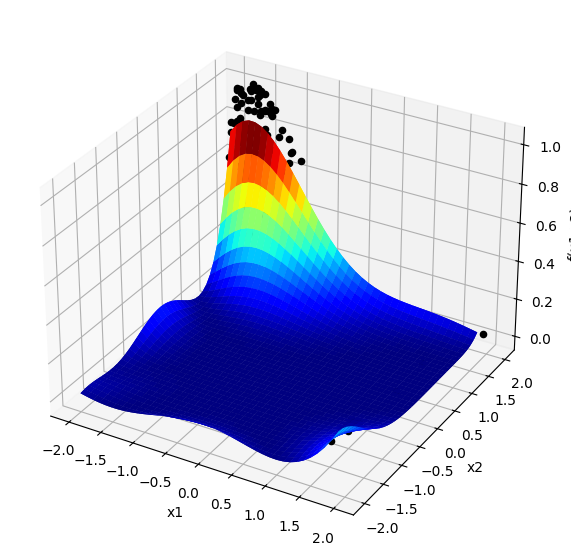


20


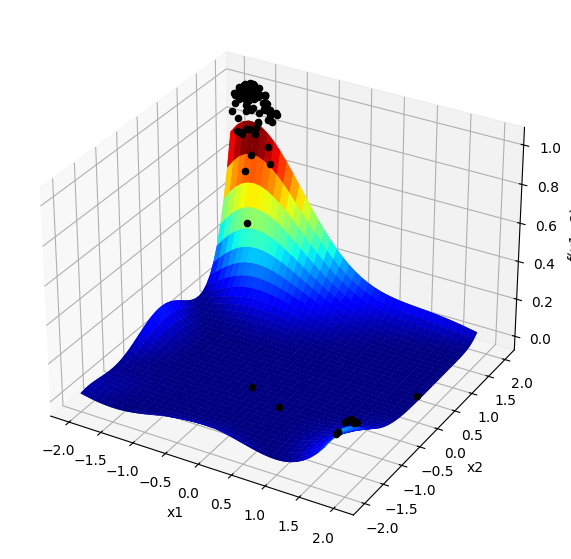


30


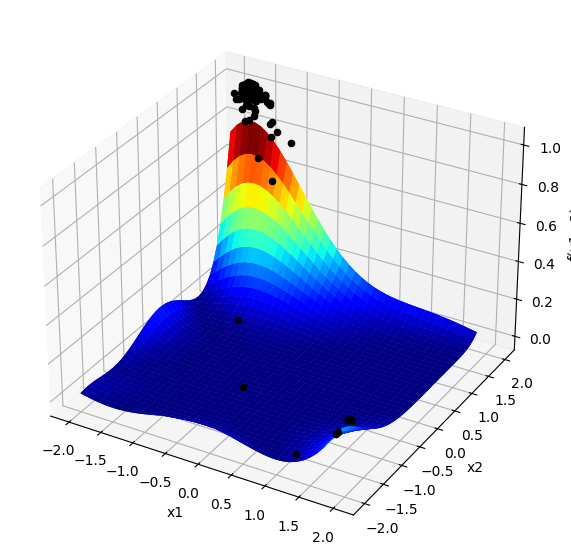


40


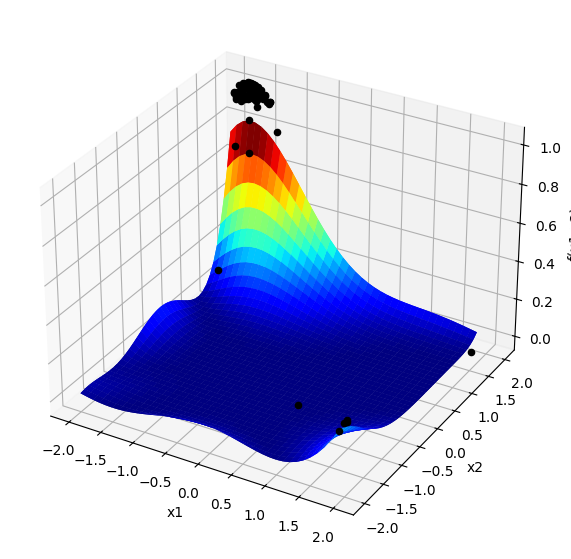


50


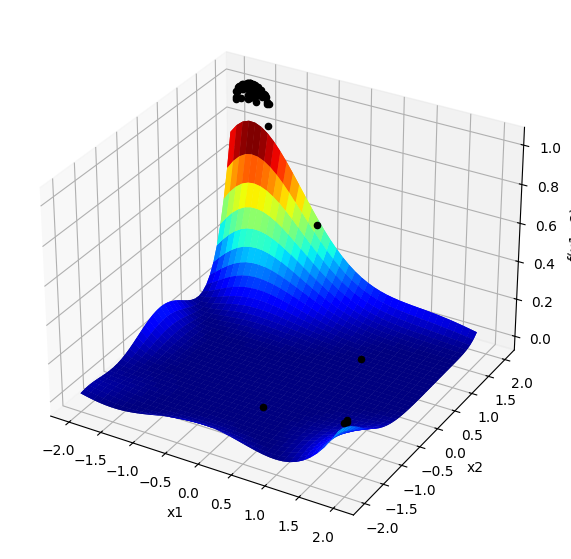

In [69]:
iterations = 50
antigen_population = rand(100, 22)
for iter in range(1, iterations + 1):
    affinity(goldstein, antigen_population, -2, 2)
    sort_population(antigen_population)
    antigen_population_with_clones = rand_clones(antigen_population, 5)
    mutate(antigen_population_with_clones, 0.3)
    affinity_clones(goldstein, antigen_population_with_clones, -2, 2)
    replace(antigen_population, antigen_population_with_clones)
    antigen_population = edit(antigen_population, 3, 22)
    if  iter == 1 or iter%10 == 0:
        print("")
        print(iter)
        plot_min_max(goldstein, antigen_population, -2, 2, 0.1)
        #for x in antigen_population:
            #print(x.x1, x.x2, x.aff)
